In [1]:
import numpy as np
import math
from scipy.integrate import ode
import Kep_2_Cart, Cart_2_Kep
from mpl_toolkits.basemap import Basemap
import filter_functions
import scipy
import scipy.io
import pickle
from IPython.core.debugger import Tracer
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import warnings
warnings.filterwarnings('ignore')

#from mpl_toolkits.basemap import Basemap

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
np.set_printoptions(precision=15)


earth_radius = 6378136.3 #m
e_earth = .081819221456 
omega_const = 7.2921158553e-5


#Date of Simulation Details:
#June 24th, 2017 at 6am (this is the date & time at the beginning of the simulation/orbit)
year = 2017
month = 6
day = 24
hour_init = 6
boulder_UT_offset = 6 #Boulder time + 6 hours = UT time
hour_init_UT = hour_init + boulder_UT_offset

In [2]:
#input the ecef x, y, z position of a space obj in order to calculate
#the lat, lon, (radians) and alt of a space obj
def ecef2geo_lat_lon_alt(r_ecef, main_body_radius):
    r = np.linalg.norm(r_ecef)
    altitude = r - main_body_radius
    
    x, y, z = r_ecef.reshape(3, 1)
    latitude = math.asin(z/r)
    
    longitude = math.atan2(y, x)
    #check by using eq. for x
    #x_calc = r*math.cos(latitude)*math.cos(longitude)
    #print(x_calc - x)
    return (latitude, longitude, altitude)

In [6]:
#Read in True Orbit

truth_file = open('Data Files/meas_az_el_range_MultiObj.pkl', 'rb')
mydict2 = pickle.load(truth_file)
truth_file.close()
measurement_array = mydict2['measurement_array']
truth_xyz = mydict2['true_state']
lat_lst_meas_array = mydict2['lat_lst_array']
print(np.shape(truth_xyz))
pos_array = truth_xyz[:, 0:3]


num_of_objects = 9

start_index = np.where(measurement_array[:,0] > 0)[0][0] #60000
print(start_index)
stop_index = len(measurement_array) #np.where(measurement_array[:,0] == 82980)[0][0]
print(stop_index)

measurement_array = measurement_array[start_index:stop_index]
pos_array = pos_array[start_index:stop_index]


(469, 7)
0
469


In [7]:
#loop and calc lat, lon



length = len(measurement_array)

lon_array = np.zeros(length)
lat_gd_array = np.zeros(length)



for ii in range(length):
    
    delta_t = measurement_array[ii, 0]

    r_eci = pos_array[ii, :]

    r_ecef = filter_functions.eci2ecef(r_eci, year, month, day, hour_init_UT, delta_t, omega_const)
    

    #step f
    latitude, longitude, altitude = ecef2geo_lat_lon_alt(r_ecef, earth_radius)
    
    #step g
    latitude_geodetic = math.atan2(math.tan(latitude), 1-e_earth**2)

    lon_array[ii] = longitude
    lat_gd_array[ii] = latitude_geodetic
    


1 b
2 g
3 r
4 c
5 m
6 y
7 k
8 w
9 b


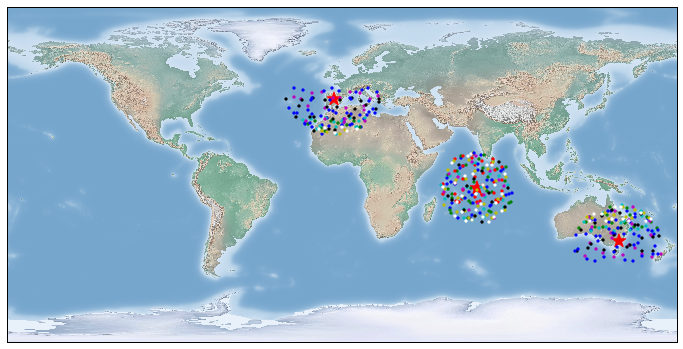

In [8]:

#determine indices for each object




fig = plt.figure(figsize=(12,8))
#create simple basemap obj
m = Basemap()
# add coastlines to basemap
#m.drawcoastlines()
m.shadedrelief()


#Canbera Station (DSS 34) Australia
#Madrid Station (DSS 65) -- correct position of Madrid Station
#Diego Garcia, British Indian Ocean Territory 7.41173°S 72.45222°E., Space Fence (Dedicated Sensor
station_lons = np.radians(np.array([(355.749444-360), 148.981944, 72.45222])) #lons must be -180 to 180
station_lats = np.radians(np.array([40.427222, -35.398333, -7.41173])) #

station_lats_gd = np.zeros((len(station_lons)))
for ii in range(len(station_lons)):
    station_lats_gd[ii] = math.atan2(math.tan(station_lats[ii]), 1-e_earth**2)

m.scatter(np.degrees(station_lons[0]), np.degrees(station_lats_gd[0]), s=200, marker='*', color='r')
m.scatter(np.degrees(station_lons[1]), np.degrees(station_lats_gd[1]), s=200, marker='*', color='r')
m.scatter(np.degrees(station_lons[2]), np.degrees(station_lats_gd[2]), s=200, marker='*', color='r')





colors = np.array(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])

count = 0

for ii in range(num_of_objects):

    print((ii+1), colors[count])
    

    obj_indices = np.where(measurement_array[:, 2] == (ii+1))[0]
    
    

    
    #plot the groudtrack (lat & lon values) on basemap 
    m.scatter(np.degrees(lon_array[obj_indices]), \
                          np.degrees(lat_gd_array[obj_indices]), marker='.', color=colors[count])
    
    count = count + 1
    if count == 8:
        count = 0


fig.savefig('Figures/GroundTrack.png')

-28.172024695514295 -65.11519571602933 -64.48612340849951
-29.887597026528983 -65.29379948538333 -68.32064632392074
-32.08551766245212 -64.47342121464347 -71.38805446800471
-34.6630924159786 -62.73319935519512 -73.27179198839252
-37.52223068077597 -60.22888436614735 -73.57164548336195
-40.573912809945604 -57.13476718390016 -72.219520524207
-43.737361161560244 -53.606079397367736 -69.55237389899003
-46.936345932765505 -49.76748789549913 -66.01667863774487
-50.094128301917834 -45.716396210155274 -61.95098822250978
-53.127786274807654 -41.531384212614455 -57.56683908116872
-55.94251769739145 -37.28173986080528 -52.99158543185391
-58.42716964163596 -33.03777467313603 -48.30496175646527
-60.453833845613346 -28.88368601533395 -43.561624754093145
-61.88627621993636 -24.936133042296493 -38.804932088485494
-62.60143317489294 -21.371696766708425 -34.07701541483322
-62.52071823570537 -18.458883559672817 -29.42920907473664
-61.63529974853678 -16.560655472555418 -24.93740702378135
-60.0072007872355

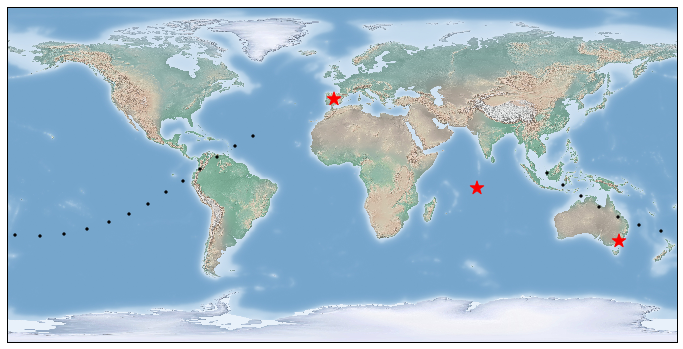

In [97]:


#Canbera Station (DSS 34) Australia
lat_dss34 = math.radians(-35.398333)
lon_dss34 = math.radians(148.981944)
alt_dss34 = 691.75 #m

r_ecef_dss34 = filter_functions.topo2ecef(lat_dss34, lon_dss34, alt_dss34, earth_radius)
#print(r_ecef_dss34)

#Madrid Station (DSS 65) -- correct position of Madrid Station
lat_dss65 = math.radians(40.427222)
lon_dss65 = math.radians(355.749444)
alt_dss65 = 834.539 #m

r_ecef_dss65 = filter_functions.topo2ecef(lat_dss65, lon_dss65, alt_dss65, earth_radius)
#print(r_ecef_dss65)


#Diego Garcia, British Indian Ocean Territory 7.41173°S 72.45222°E., Space Fence (Dedicated Sensor
lat_diego = math.radians(-7.41173)
lon_diego = math.radians(72.45222)
alt_diego = 0 #m, "sea level"

r_ecef_diego = filter_functions.topo2ecef(lat_diego, lon_diego, alt_diego, earth_radius)


fig = plt.figure(figsize=(12,8))
#create simple basemap obj
m = Basemap()
# add coastlines to basemap
#m.drawcoastlines()
m.shadedrelief()


#Canbera Station (DSS 34) Australia
#Madrid Station (DSS 65) -- correct position of Madrid Station
#Diego Garcia, British Indian Ocean Territory 7.41173°S 72.45222°E., Space Fence (Dedicated Sensor
station_lons = np.radians(np.array([(355.749444-360), 148.981944, 72.45222])) #lons must be -180 to 180
station_lats = np.radians(np.array([40.427222, -35.398333, -7.41173])) #

station_lats_gd = np.zeros((len(station_lons)))
for ii in range(len(station_lons)):
    station_lats_gd[ii] = math.atan2(math.tan(station_lats[ii]), 1-e_earth**2)

m.scatter(np.degrees(station_lons[0]), np.degrees(station_lats_gd[0]), s=200, marker='*', color='r')
m.scatter(np.degrees(station_lons[1]), np.degrees(station_lats_gd[1]), s=200, marker='*', color='r')
m.scatter(np.degrees(station_lons[2]), np.degrees(station_lats_gd[2]), s=200, marker='*', color='r')


booll = False

count = 0

for ii in range(20):

    #print(ii)
    
    #Tracer() ()
    
    elevation1 = filter_functions.calculate_elevation(r_ecef_dss34, truth_xyz[ii,:3], measurement_array[ii,0], \
                                                      omega_const, earth_radius)
    elevation2 = filter_functions.calculate_elevation(r_ecef_dss65, truth_xyz[ii,:3], measurement_array[ii,0], \
                                                      omega_const, earth_radius)
    elevation3 = filter_functions.calculate_elevation(r_ecef_diego, truth_xyz[ii,:3], measurement_array[ii,0], \
                                                      omega_const, earth_radius)
    print(elevation1, elevation2, elevation3)
    
    
    if((elevation1 < 90) & (elevation1 > 0)):
        #print('1',elevation1)
        m.scatter(np.degrees(lon_array[ii]), \
                          np.degrees(lat_gd_array[ii]), marker='.', color='b')
        booll = True
        
    if ((elevation2 < 90) & (elevation2 > 0)):
        #print('2',elevation2)
        m.scatter(np.degrees(lon_array[ii]), \
                          np.degrees(lat_gd_array[ii]), marker='.', color='b')
        booll = True
    
    if ((elevation3 < 90) & (elevation3 > 0)):
        #print('3',elevation3)
        m.scatter(np.degrees(lon_array[ii]), \
                          np.degrees(lat_gd_array[ii]), marker='.', color='b')
        booll = True
        
    
    if booll == False:
        #print(elevation1, elevation2, elevation3)
        m.scatter(np.degrees(lon_array[ii]), \
                          np.degrees(lat_gd_array[ii]), marker='.', color='k')

            
    booll = False



#fig.savefig('Figures/GroundTrack.png')



In [ ]:
[-4456140.836250959895551,  2679431.193578156642616,
       -3694983.710091796237975]), array([[-6188194.326887605711818, -2764362.123844954650849,
           87657.929595418841927]]), 180.0, 7.2921158553e-05, 6378136.3)

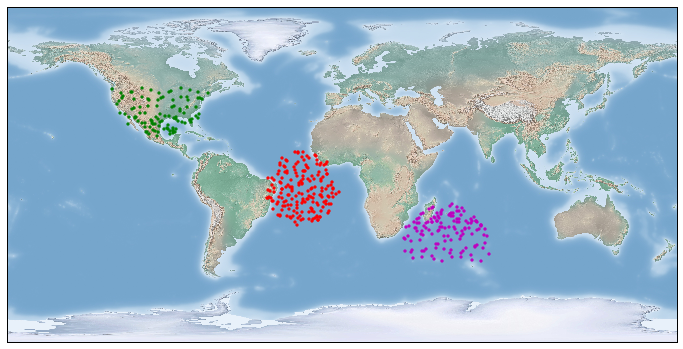

In [16]:

#determine indices for each object
  

indices_1 = np.where(measurement_array[:stop_index, 1] == 1)[0]
indices_2 = np.where(measurement_array[:stop_index, 1] == 2)[0]
indices_3 = np.where(measurement_array[:stop_index, 1] == 3)[0]
#indices_4 = np.where(measurement_array[:stop_index, 2] == 4)[0]



fig = plt.figure(figsize=(12,8))
#create simple basemap obj
m = Basemap()
# add coastlines to basemap
#m.drawcoastlines()
m.shadedrelief()
#plot the groudtrack (lat & lon values) on basemap 
m.scatter(np.degrees(lon_array[indices_1]), np.degrees(lat_gd_array[indices_1]), marker='.', color='m')
m.scatter(np.degrees(lon_array[indices_2]), np.degrees(lat_gd_array[indices_2]), marker='.', color='g')
m.scatter(np.degrees(lon_array[indices_3]), np.degrees(lat_gd_array[indices_3]), marker='.', color='r')
#m.scatter(np.degrees(lon_array[indices_4]), np.degrees(lat_gd_array[indices_4]), marker='.', color='k')


#fig.savefig('Figures/GroundTrack.png')

In [6]:
indices = np.where(measurement_array[:, 1] == 1)[0]
print(indices)
indices = np.where(measurement_array[:, 1] == 2)[0]
print(indices)
indices = np.where(measurement_array[:, 1] == 3)[0]
print(indices)


indices = np.where(measurement_array[:, 2] == 1)[0]
print(indices)
indices = np.where(measurement_array[:, 2] == 2)[0]
print(indices)
indices = np.where(measurement_array[:, 2] == 3)[0]
print(indices)

[0]
[]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83]
[ 9 10 25 27 29 31 53 55 57]
[ 0 35 62 63 64 81 82 83]
[ 3  4  5  6 18 19 20 22 45 47 48 51 75 76]


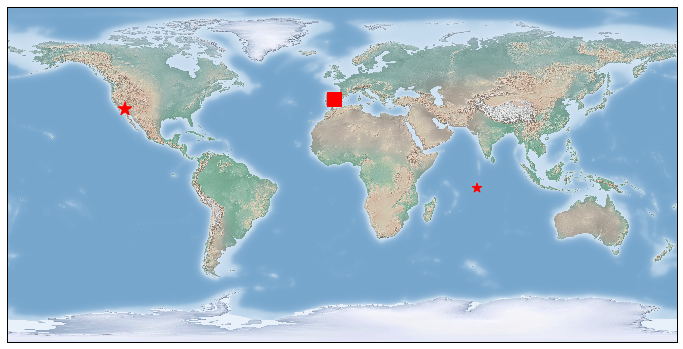

In [22]:

#determine indices for each object




fig = plt.figure(figsize=(12,8))
#create simple basemap obj
m = Basemap()
# add coastlines to basemap
#m.drawcoastlines()
m.shadedrelief()


#Madrid Station (DSS 65) -- correct position of Madrid Station
#Goldstone Station (DSS 13) California
#Diego Garcia, British Indian Ocean Territory 7.41173°S 72.45222°E., Space Fence (Dedicated Sensor
station_lons = np.radians(np.array([(355.749444-360), (243.205-360), 72.45222])) #lons must be -180 to 180
station_lats = np.radians(np.array([40.427222, 35.247164, -7.41173])) #


station_lats_gd = np.zeros((len(station_lons)))
for ii in range(len(station_lons)):
    station_lats_gd[ii] = math.atan2(math.tan(station_lats[ii]), 1-e_earth**2)



m.scatter(np.degrees(station_lons[0]), np.degrees(station_lats_gd[0]), s=200, marker='*', color='r')
m.scatter(np.degrees(station_lons[1]), np.degrees(station_lats_gd[1]), s=200, marker='*', color='r')
m.scatter(np.degrees(station_lons[2]), np.degrees(station_lats_gd[2]), s=200, marker='*', color='r')


fig.savefig('Figures/GroundTrack.png')

In [5]:
print(np.degrees(station_lons))
print(np.degrees(station_lats_gd))

[ 355.749443999999983  243.205000000000013   72.452219999999997]
[ 40.61730070651231   35.428747583021767  -7.461120428522336]
